<a href="https://colab.research.google.com/github/allineBrito/Censo/blob/main/Censo_Superior_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

low_memory = False


In [242]:
Cursos = pd.read_csv('/content/drive/MyDrive/Pasta sem nome/superiorcursos21.csv', sep=";", encoding='ISO-8859-1')
IES = pd.read_csv('/content/drive/MyDrive/Pasta sem nome/supeiror2020IES.csv', encoding='ISO-8859-15', sep = ';')

# ***INFORMAÇÕES SOBRE AS INSTITUIÇÕES DE ENSINO***

In [243]:
ies = IES['CO_IES'].nunique()
print(f'Total de IES no Brasil: {ies}')

Total de IES no Brasil: 2457


In [244]:
uf_ies = IES.copy()[['CO_IES', 'SG_IES', 'NU_ANO_CENSO']]
uf_ies

,CO_IES,SG_IES,NU_ANO_CENSO
0,1,UFMT,2020
1,2,UNB,2020
2,3,UFS,2020
3,4,UFAM,2020
4,5,UFPI,2020
...,...,...,...
2452,25274,UFCAT,2020
2453,25275,UFAPE,2020
2454,25277,UFDPAR,2020
2455,25282,UFJ,2020


In [ ]:
cod_curso = Cursos.copy()[['NU_ANO_CENSO' ,'CO_IES', 'SG_UF', 'NO_REGIAO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_REDE', 'TP_MODALIDADE_ENSINO', 'QT_MAT', 'QT_MAT_AMARELA', 'QT_MAT_BRANCA', 'QT_MAT_CORND', 
                           'QT_MAT_INDIGENA', 'QT_MAT_PARDA', 'QT_MAT_PRETA', 'QT_VG_TOTAL', 'QT_ING']]
cod_curso

In [246]:
brancos = cod_curso['QT_MAT_BRANCA'].sum()
pretos = cod_curso['QT_MAT_PRETA'].sum()
pardos = cod_curso['QT_MAT_PARDA'].sum()
idígenas = cod_curso['QT_MAT_INDIGENA'].sum()
nda = cod_curso['QT_MAT_CORND'].sum()
amarelo = cod_curso['QT_MAT_AMARELA'].sum()
total = cod_curso['QT_MAT'].sum()
print(f'Total de alunos brancos inscritos em algum curso de IES: {brancos}')
print(f'Total de alunos pretos inscritos em algum curso de IES: {pretos}')
print(f'Total de alunos pardos inscritos em algum curso de IES: {pardos}')
print(f'Total de alunos indígenas inscritos em algum curso de IES: {idígenas}')
print(f'Total de alunos amarelos inscritos em algum curso de IES: {amarelo}')
print(f'Total de alunos Não declarado inscritos em algum curso de IES: {nda}')

Total de alunos brancos inscritos em algum curso de IES: 3684058
Total de alunos pretos inscritos em algum curso de IES: 617348
Total de alunos pardos inscritos em algum curso de IES: 2648367
Total de alunos indígenas inscritos em algum curso de IES: 47267
Total de alunos amarelos inscritos em algum curso de IES: 142920
Total de alunos Não declarado inscritos em algum curso de IES: 1540985


In [247]:
print(f' A média total de aluno por IES é de {int(total/ies)}')
print(f' A média de aluno brancos por IES é de {int(brancos/ies)}')
print(f' A média de aluno pretos por IES é de {int(pretos/ies)}')
print(f' A média de aluno pardos por IES é de {int(pardos/ies)}')
print(f' A média de aluno indígenas por IES é de {int(idígenas/ies)}')
print(f' A média de aluno Não declarado por IES é de {int(nda/ies)}')

 A média total de aluno por IES é de 3533
 A média de aluno brancos por IES é de 1499
 A média de aluno pretos por IES é de 251
 A média de aluno pardos por IES é de 1077
 A média de aluno indígenas por IES é de 19
 A média de aluno Não declarado por IES é de 627


In [ ]:
# Juntando os dados de cursos e IES
df = cod_curso.merge(uf_ies, how='left', left_on='CO_IES', right_on='CO_IES')
df

In [249]:
alunos= pd.pivot_table(data=df, values='QT_MAT', aggfunc='sum', columns='SG_IES').transpose()
alunos.sort_values('QT_MAT', ascending=False, inplace=True) #ordenar pelo maior número de inscritos
alunos

,QT_MAT
SG_IES,
UNIP,462253
UNIASSELVI,400280
UNESA,365772
UNINTER,200439
UNICESUMAR,199283
...,...
UNI-BAN,0
FABC,0
FACEAT,0


In [250]:
ies2 = IES.copy()[['NO_REGIAO_IES', 'CO_IES', 'SG_UF_IES', 'SG_IES', 'TP_CATEGORIA_ADMINISTRATIVA']]
ies2

,NO_REGIAO_IES,CO_IES,SG_UF_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Centro-Oeste,1,MT,UFMT,1
1,Centro-Oeste,2,DF,UNB,1
2,Nordeste,3,SE,UFS,1
3,Norte,4,AM,UFAM,1
4,Nordeste,5,PI,UFPI,1
...,...,...,...,...,...
2452,Centro-Oeste,25274,GO,UFCAT,1
2453,Nordeste,25275,PE,UFAPE,1
2454,Nordeste,25277,PI,UFDPAR,1
2455,Centro-Oeste,25282,GO,UFJ,1


In [251]:
di_rede= {
1: "Pública Federal",
2: "Pública Estadual",
3: "Pública Municipal",
4: "Privada com fins lucrativos",
5: "Privada sem fins lucrativos",
6: "Privada - Particular em sentido estrito",
7: "Especial",
8: "Privada comunitária",
9: "Privada confessional"}

ies2 = IES.replace({"TP_CATEGORIA_ADMINISTRATIVA": di_rede})

In [ ]:
uf= IES.loc[ies2['SG_IES'].isna()]
uf.reset_index(inplace=True, drop=True)
uf

In [253]:
ies2[ies2.SG_IES.isnull()== False]

,NU_ANO_CENSO,NO_REGIAO_IES,CO_REGIAO_IES,NO_UF_IES,SG_UF_IES,CO_UF_IES,NO_MUNICIPIO_IES,CO_MUNICIPIO_IES,IN_CAPITAL_IES,NO_MESORREGIAO_IES,...,QT_DOC_EX_60_MAIS,QT_DOC_EX_BRANCA,QT_DOC_EX_PRETA,QT_DOC_EX_PARDA,QT_DOC_EX_AMARELA,QT_DOC_EX_INDIGENA,QT_DOC_EX_COR_ND,QT_DOC_EX_BRA,QT_DOC_EX_EST,QT_DOC_EX_COM_DEFICIENCIA
0,2020,Centro-Oeste,5,Mato Grosso,MT,51,Cuiabá,5103403,1,Centro-Sul Mato-grossense,...,177,890,64,348,38,6,148,1460,34,2
1,2020,Centro-Oeste,5,Distrito Federal,DF,53,Brasília,5300108,1,Distrito Federal,...,445,1741,87,439,60,5,437,2617,152,6
2,2020,Nordeste,2,Sergipe,SE,28,São Cristóvão,2806701,0,Leste Sergipano,...,151,159,30,254,5,2,1321,1744,27,4
3,2020,Norte,1,Amazonas,AM,13,Manaus,1302603,1,Centro Amazonense,...,185,53,7,64,2,4,1623,1752,1,0
4,2020,Nordeste,2,Piauí,PI,22,Teresina,2211001,1,Centro-Norte Piauiense,...,213,99,39,182,0,2,1089,1411,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,2020,Centro-Oeste,5,Goiás,GO,52,Catalão,5205109,0,Sul Goiano,...,11,193,12,63,5,0,67,334,6,0
2453,2020,Nordeste,2,Pernambuco,PE,26,Garanhuns,2606002,0,Agreste Pernambucano,...,5,7,0,1,0,0,166,174,0,0
2454,2020,Nordeste,2,Piauí,PI,22,Parnaíba,2207702,0,Norte Piauiense,...,15,18,3,29,1,0,186,237,0,0
2455,2020,Centro-Oeste,5,Goiás,GO,52,Jataí,5211909,0,Sul Goiano,...,10,150,16,57,4,0,154,378,3,1


**Nas região Centro_Oeste, Nordeste, Norte, Sudeste e Sul o número total de IES subsequente é: 244, 460, 157, 901, 304**

In [254]:
ies2[ies2.SG_IES.isnull()== False]
pivot = pd.pivot_table(data=ies2, values='CO_IES', aggfunc='count', columns=['NO_REGIAO_IES', 'TP_CATEGORIA_ADMINISTRATIVA']).transpose()
pivot.reset_index(inplace=True)
pivot

,NO_REGIAO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_IES
0,Centro-Oeste,Privada com fins lucrativos,165
1,Centro-Oeste,Privada sem fins lucrativos,77
2,Centro-Oeste,Pública Estadual,5
3,Centro-Oeste,Pública Federal,14
4,Centro-Oeste,Pública Municipal,3
5,Nordeste,Especial,18
6,Nordeste,Privada com fins lucrativos,372
7,Nordeste,Privada sem fins lucrativos,116
8,Nordeste,Pública Estadual,15
9,Nordeste,Pública Federal,30


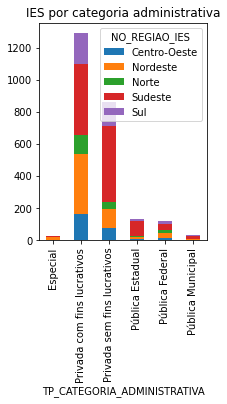

In [255]:
ies2.groupby('TP_CATEGORIA_ADMINISTRATIVA')['NO_REGIAO_IES'].value_counts().unstack().plot(kind='bar', stacked=True);
# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (3,4);
plt.title('IES por categoria administrativa');

# ***CURSO***

In [256]:
di_adm = {
1: "Pública Federal",
2: "Pública Estadual",
3: "Pública Municipal",
4: "Privada com fins lucrativos",
5: "Privada sem fins lucrativos",
6: "Privada - Particular em sentido estrito",
7: "Especial",
8: "Privada comunitária",
9: "Privada confessional"}

di_rede= {
1: "Pública",  
2: "Privada"}

di_modalidade= {
1: "Presencial",  
2: "EAD"}

di_acad = {
1: "Universidade",
2: "Centro Universitário",
3: "Faculdade",
4: "IF",                                
5: "CFET"}

df = Cursos.replace({"TP_CATEGORIA_ADMINISTRATIVA": di_adm, "TP_REDE": di_rede, "TP_MODALIDADE_ENSINO": di_modalidade, "TP_ORGANIZACAO_ACADEMICA" :di_acad })

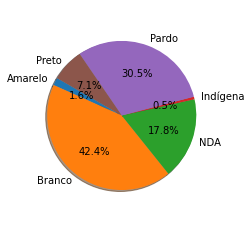

In [257]:
# Matriculas por raça ou cor
labels = 'Amarelo', 'Branco', 'NDA', 'Indígena', 'Pardo', 'Preto'
values = [amarelo, brancos, nda, idígenas, pardos, pretos]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=150)
ax1.axis('equal')
plt.show()

In [258]:
#Quantidade de matrículas por Tipo da Organização Acadêmica da IES

df[df['TP_ORGANIZACAO_ACADEMICA']== 'Centro Universitário']['QT_MAT_PRETA'].sum()

147143

In [259]:
pd.pivot_table(data=df, values=['QT_MAT_BRANCA', 'QT_MAT_PRETA', 'QT_MAT_PARDA','QT_MAT_AMARELA', 'QT_MAT_INDIGENA', 'QT_MAT_CORND'],
                aggfunc='sum', columns=['TP_REDE', 'TP_MODALIDADE_ENSINO']).transpose()   

QT_MAT_AMARELA  QT_MAT_BRANCA  QT_MAT_CORND  \
TP_REDE TP_MODALIDADE_ENSINO                                                
Privada EAD                            46512        1127730        633088   
        Presencial                     60071        1730173        663182   
Pública EAD                             1719          52240         41169   
        Presencial                     34618         773915        203546   

                              QT_MAT_INDIGENA  QT_MAT_PARDA  QT_MAT_PRETA  
TP_REDE TP_MODALIDADE_ENSINO                                               
Privada EAD                             11092        950802        179207  
        Presencial                      22929       1064841        234712  
Pública EAD                               513         49176         12555  
        Presencial                      12733        583548        190874

In [ ]:
df_raca = pd.pivot_table(data=df, values=['QT_MAT_AMARELA', 'QT_MAT_BRANCA', 'QT_MAT_CORND', 'QT_MAT_INDIGENA', 'QT_MAT_PARDA', 'QT_MAT_PRETA'], aggfunc='sum', 
                         columns=['NO_CINE_ROTULO']).transpose()
df_raca.reset_index(inplace=True)

df_raca['NEGRA'] = df_raca['QT_MAT_PRETA'] + df_raca['QT_MAT_PARDA']
df_raca['TOTAL'] = df_raca['QT_MAT_AMARELA'] + df_raca['QT_MAT_BRANCA'] + df_raca['QT_MAT_CORND'] + df_raca['QT_MAT_INDIGENA'] + df_raca['QT_MAT_PRETA'] + df_raca['QT_MAT_PARDA']
df_raca [:5]

**Se Pegarmos 1000 alunos, de forma aleatória, qual a probabilidade de pelo menos 80 serem pretos?**

In [276]:
total = df_raca['TOTAL'].sum()
pretos = df_raca['QT_MAT_PRETA'].sum()
n = 1000
p = pretos/total
p

0.07111529908322194

In [277]:
alunos_pretos = np.random.binomial(n, p, size=1000000)

In [282]:
probabilidade = (sum(alunos_pretos >= 80)/1000000)*100
print(f'A probabilidade de termos pelo menos 80 alunos pretos dentre 1000 alunos é de {round(probabilidade,2)}%')

A probabilidade de termos pelo menos 80 alunos pretos dentre 1000 alunos é de 15.12%
